In [1]:
#Importing the required libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, f1_score,precision_score, recall_score, confusion_matrix ,ConfusionMatrixDisplay
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style='whitegrid', palette = 'deep', rc = {'axes.grid':True})
%matplotlib inline

In [2]:
#loading the data
data = pd.read_csv(r'C:/Users/Dell/Downloads/capstone/Lung Cancer Prediction with Symptoms/survey lung cancer.csv')
data.head()


,GENDER,AGE,SMOKING,YELLOW_FINGERS,ANXIETY,PEER_PRESSURE,CHRONIC DISEASE,FATIGUE,ALLERGY,WHEEZING,ALCOHOL CONSUMING,COUGHING,SHORTNESS OF BREATH,SWALLOWING DIFFICULTY,CHEST PAIN,LUNG_CANCER
0,M,69,1,2,2,1,1,2,1,2,2,2,2,2,2,YES
1,M,74,2,1,1,1,2,2,2,1,1,1,2,2,2,YES
2,F,59,1,1,1,2,1,2,1,2,1,2,2,1,2,NO
3,M,63,2,2,2,1,1,1,1,1,2,1,1,2,2,NO
4,F,63,1,2,1,1,1,1,1,2,1,2,2,1,1,NO


In [3]:
data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 309 entries, 0 to 308
Data columns (total 16 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   GENDER                 309 non-null    object
 1   AGE                    309 non-null    int64 
 2   SMOKING                309 non-null    int64 
 3   YELLOW_FINGERS         309 non-null    int64 
 4   ANXIETY                309 non-null    int64 
 5   PEER_PRESSURE          309 non-null    int64 
 6   CHRONIC DISEASE        309 non-null    int64 
 7   FATIGUE                309 non-null    int64 
 8   ALLERGY                309 non-null    int64 
 9   WHEEZING               309 non-null    int64 
 10  ALCOHOL CONSUMING      309 non-null    int64 
 11  COUGHING               309 non-null    int64 
 12  SHORTNESS OF BREATH    309 non-null    int64 
 13  SWALLOWING DIFFICULTY  309 non-null    int64 
 14  CHEST PAIN             309 non-null    int64 
 15  LUNG_CANCER            

In [4]:
data_new = data.drop(['GENDER','AGE', 'SMOKING', 'ALCOHOL CONSUMING', 'CHRONIC DISEASE', 'PEER_PRESSURE', 'ALLERGY '], axis = 1)
symptoms = [ 'YELLOW_FINGERS', 'ANXIETY', 'FATIGUE ',  'WHEEZING', 'COUGHING', 'SHORTNESS OF BREATH', 'SWALLOWING DIFFICULTY', 'CHEST PAIN']
X = data_new[symptoms]
y = data_new.LUNG_CANCER
X.head()

,YELLOW_FINGERS,ANXIETY,FATIGUE,WHEEZING,COUGHING,SHORTNESS OF BREATH,SWALLOWING DIFFICULTY,CHEST PAIN
0,2,2,2,2,2,2,2,2
1,1,1,2,1,1,2,2,2
2,1,1,2,2,2,2,1,2
3,2,2,1,1,1,1,2,2
4,2,1,1,2,2,2,1,1


In [5]:
y.head()

0    YES
1    YES
2     NO
3     NO
4     NO
Name: LUNG_CANCER, dtype: object

In [6]:
X_train, X_test, y_train, y_test = train_test_split( X, y, random_state = 42, stratify = y)

In [7]:
X_train.isnull().sum()

YELLOW_FINGERS           0
ANXIETY                  0
FATIGUE                  0
WHEEZING                 0
COUGHING                 0
SHORTNESS OF BREATH      0
SWALLOWING DIFFICULTY    0
CHEST PAIN               0
dtype: int64

In [8]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 309 entries, 0 to 308
Data columns (total 8 columns):
 #   Column                 Non-Null Count  Dtype
---  ------                 --------------  -----
 0   YELLOW_FINGERS         309 non-null    int64
 1   ANXIETY                309 non-null    int64
 2   FATIGUE                309 non-null    int64
 3   WHEEZING               309 non-null    int64
 4   COUGHING               309 non-null    int64
 5   SHORTNESS OF BREATH    309 non-null    int64
 6   SWALLOWING DIFFICULTY  309 non-null    int64
 7   CHEST PAIN             309 non-null    int64
dtypes: int64(8)
memory usage: 19.4 KB


In [9]:
le = LabelEncoder()
y_train= le.fit_transform(y_train)
y_test= le.transform(y_test)

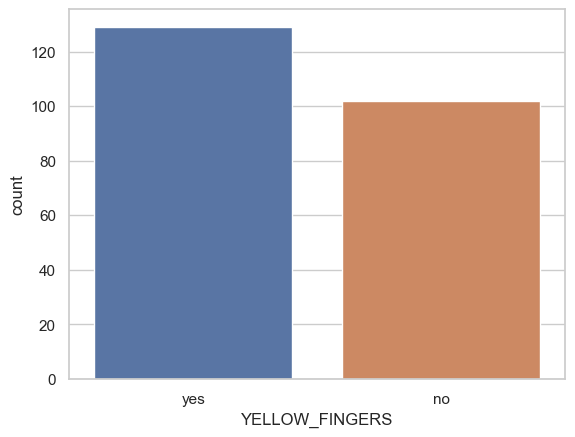

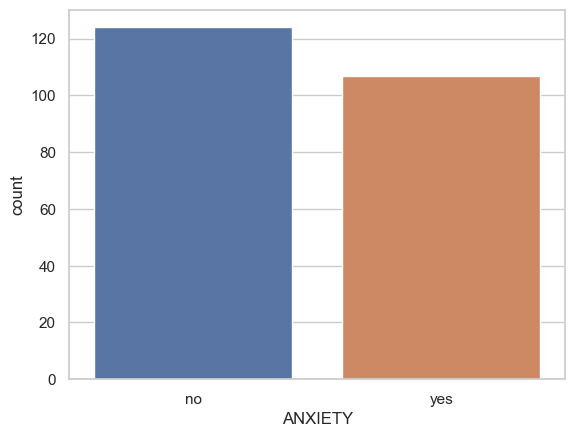

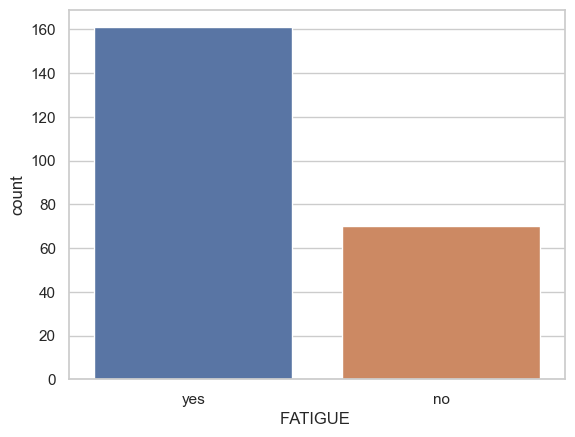

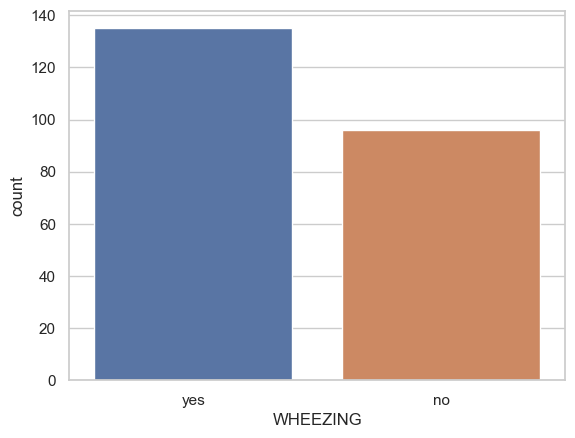

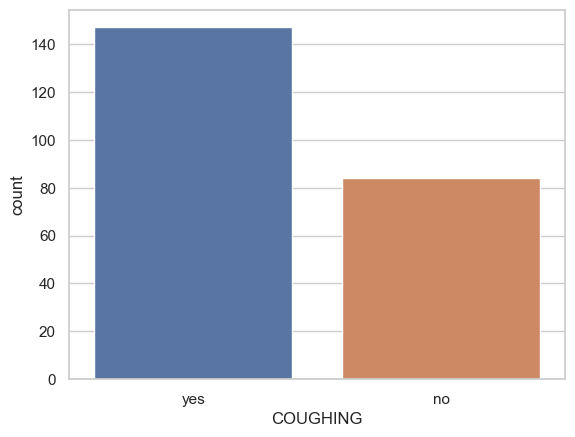

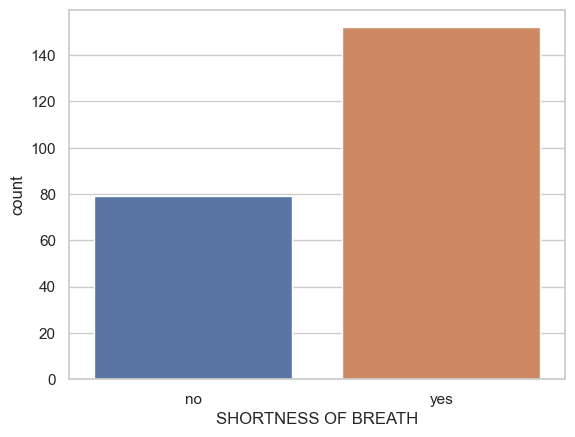

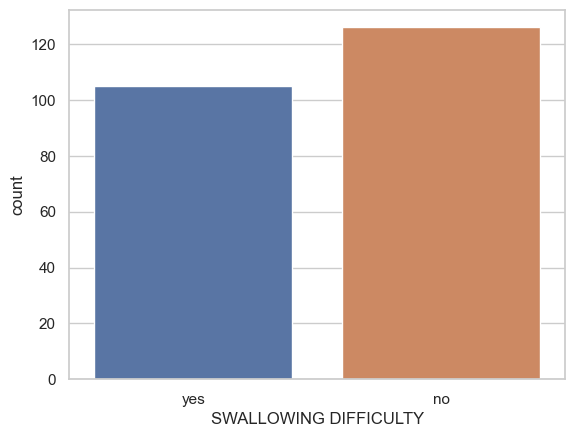

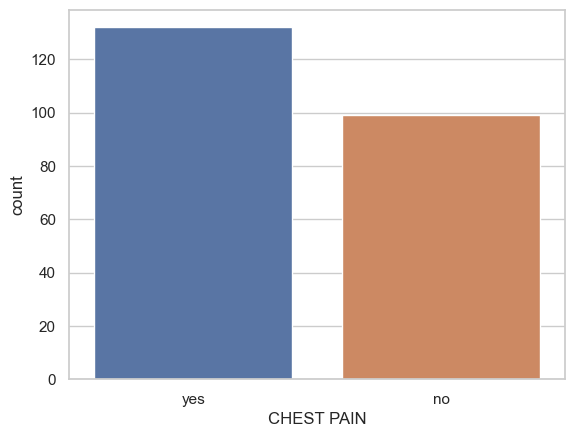

In [10]:
key = {2: 'yes', 1: 'no'}
for sys in symptoms:
	sns.countplot(x = X_train[sys].replace(key))    
	plt.show()

<Axes: ylabel='count'>

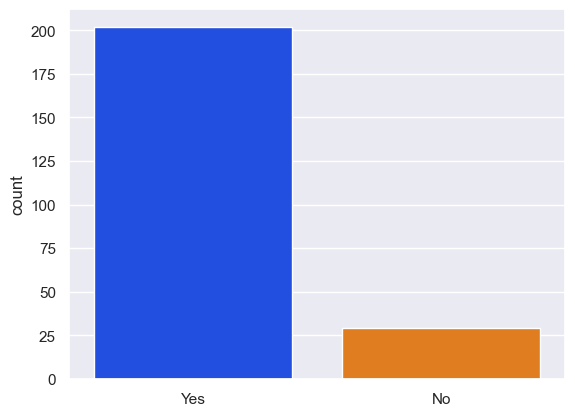

In [11]:
sns.set(style = 'darkgrid',palette = 'bright')
sns.countplot(x = pd.Series(y_train).replace([0,1],['No','Yes']))

In [12]:
model =  RandomForestClassifier(n_estimators = 100, random_state = 42)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
print('The accuracy score of this Random Forest Classifier model is: {0:.1f}%'.format(100*accuracy_score(y_test, y_pred)))

The accuracy score of this Random Forest Classifier model is: 92.3%


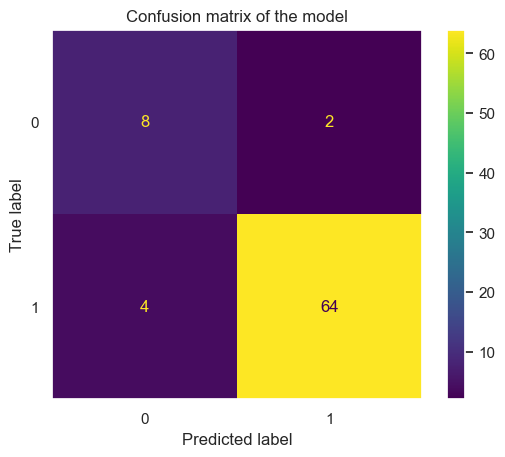

In [13]:
sns.set(rc = {'axes.grid':False})
ConfusionMatrixDisplay.from_predictions(y_test, y_pred)
plt.title('Confusion matrix of the model')
plt.show()

In [14]:
print('The precision of this model is {0:.1f}%'.format(100* precision_score(y_test,y_pred)))

print ('The recall score of this model is {0:.1f}%'.format(100*recall_score(y_test, y_pred)))

print('The harmonic mean of the precision score and recall score is:', f1_score(y_test,y_pred))

The precision of this model is 97.0%
The recall score of this model is 94.1%
The harmonic mean of the precision score and recall score is: 0.955223880597015


In [15]:
#features importance
Symptoms_importance = pd.DataFrame(  {"Symptoms": list(X.columns), "importance": model.feature_importances_}).sort_values("importance", ascending=False)
# Display
print(Symptoms_importance)

                Symptoms  importance
0         YELLOW_FINGERS    0.152723
4               COUGHING    0.150052
7             CHEST PAIN    0.133490
2               FATIGUE     0.124247
3               WHEEZING    0.122971
1                ANXIETY    0.120900
5    SHORTNESS OF BREATH    0.106120
6  SWALLOWING DIFFICULTY    0.089497


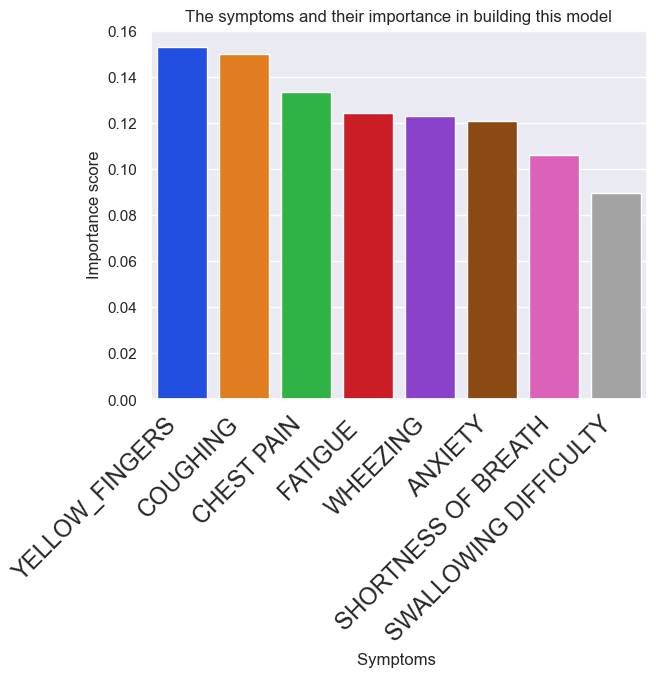

In [16]:
# Creating a bar plot
sns.set(palette = 'bright',rc ={'axes.grid':True})
sns.barplot(x=Symptoms_importance.Symptoms, y=Symptoms_importance.importance)
plt.xlabel("Symptoms ")
plt.ylabel("Importance score")
plt.title("The symptoms and their importance in building this model")
plt.xticks( rotation=45, horizontalalignment="right", fontweight="light", fontsize="x-large")
plt.show()

In [17]:
import pickle

In [18]:
filename = 'trained_model.pkl'
pickle.dump(model, open(filename,'wb'))

In [19]:
model = pickle.load(open('trained_model.pkl','rb'))
print(model.predict([[2,1,1,1,2,2,1,1]]))



[0]


C:\Users\Dell\anaconda3\lib\site-packages\sklearn\base.py:420: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


In [20]:
import numpy as np
import pickle

# loading the saved model
loaded_model = pickle.load(open(r'C:\Users\Dell\Downloads\capstone\Lung Cancer Prediction with Symptoms\trained_model.pkl', 'rb'))


prediction = model.predict([[2,1,1,1,2,2,1,1]])
print(prediction)

if (prediction[0] == 0):
  print('The person does not have lung cancer')
else:
  print('The person have lung Cancer')

[0]
The person does not have lung cancer


C:\Users\Dell\anaconda3\lib\site-packages\sklearn\base.py:420: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


In [21]:
feature_values = input('Enter 8 comma-separated feature values: ')
feature_values = [float(x) for x in feature_values.split(',')]

# Make a prediction based on the input
prediction = model.predict([feature_values])[0]

# Print the prediction
if  prediction < 0.5:
    print('The person does not have lung cancer')
else:
    print('The person has lung cancer')

Enter 8 comma-separated feature values: 2,1,1,1,2,2,1,2
The person has lung cancer


C:\Users\Dell\anaconda3\lib\site-packages\sklearn\base.py:420: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


In [24]:
# Set the input values
input_data = [2, 1, 1, 1, 2, 2, 1, 1]

# Make a prediction based on the input
prediction = model.predict([input_data])[0]

# Print the prediction
if prediction < 0.5:
    print('The person does not have lung cancer')
else:
    print('The person has lung cancer')

The person does not have lung cancer


C:\Users\Dell\anaconda3\lib\site-packages\sklearn\base.py:420: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


In [25]:
import numpy as np
import pickle

# Load the saved model
loaded_model = pickle.load(open(r'C:\Users\Dell\Downloads\capstone\Lung Cancer Prediction with Symptoms/trained_model.pkl', 'rb'))

# Define a function to take user input and make predictions
def make_prediction():
    # Get user input for each symptom
    print('Please answer the following questions with 2 for "Yes" and 1 for "No".')
    yellow_fingers = input('Do you have yellow fingers? ')
    anxiety = input('Do you suffer from anxiety? ')
    fatigue = input('Do you experience fatigue? ')
    wheezing = input('Do you experience wheezing? ')
    coughing = input('Do you have a persistent cough? ')
    shortness_of_breath = input('Do you experience shortness of breath? ')
    swallowing_difficulty = input('Do you have difficulty swallowing? ')
    chest_pain = input('Do you experience chest pain? ')
    
    # Convert user input to a list of integers
    user_input = [int(yellow_fingers), int(anxiety), int(fatigue), int(wheezing), int(coughing), int(shortness_of_breath), int(swallowing_difficulty), int(chest_pain)]
    
    # Use the loaded model to make a prediction based on user input
    prediction = loaded_model.predict([user_input])[0]
    
    # Print the prediction
    if prediction > 0.5:
        print('Based on your symptoms, you are at high risk for lung cancer. Please see a doctor for further evaluation.')
    else:
        print('Based on your symptoms, you are not at high risk for lung cancer. However, it is still important to maintain good health habits and see a doctor regularly.')
        
# Call the function to make a prediction
make_prediction()


Please answer the following questions with 2 for "Yes" and 1 for "No".
Do you have yellow fingers? 2
Do you suffer from anxiety? 1
Do you experience fatigue? 1
Do you experience wheezing? 1
Do you have a persistent cough? 2
Do you experience shortness of breath? 2
Do you have difficulty swallowing? 1
Do you experience chest pain? 1
Based on your symptoms, you are not at high risk for lung cancer. However, it is still important to maintain good health habits and see a doctor regularly.


C:\Users\Dell\anaconda3\lib\site-packages\sklearn\base.py:420: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


In [26]:
import numpy as np
import pickle

# Load the saved model
loaded_model = pickle.load(open(r'C:\Users\Dell\Downloads\capstone\Lung Cancer Prediction with Symptoms/trained_model.pkl', 'rb'))

# Define a function to take user input and make predictions
def make_prediction():
    # Get user input for each symptom
    print('Please answer the following questions with 2 for "Yes" and 1 for "No".')
    yellow_fingers = input('Do you have yellow fingers? ')
    anxiety = input('Do you suffer from anxiety? ')
    fatigue = input('Do you experience fatigue? ')
    wheezing = input('Do you experience wheezing? ')
    coughing = input('Do you have a persistent cough? ')
    shortness_of_breath = input('Do you experience shortness of breath? ')
    swallowing_difficulty = input('Do you have difficulty swallowing? ')
    chest_pain = input('Do you experience chest pain? ')
    
    # Convert user input to a list of integers
    user_input = [int(yellow_fingers), int(anxiety), int(fatigue), int(wheezing), int(coughing), int(shortness_of_breath), int(swallowing_difficulty), int(chest_pain)]
    
    # Use the loaded model to make a prediction based on user input
    prediction = loaded_model.predict([user_input])[0]
    
    # Print the prediction
    if prediction > 0.5:
        print('Based on your symptoms, you are at high risk for lung cancer. Please see a doctor for further evaluation.')
    else:
        print('Based on your symptoms, you are not at high risk for lung cancer. However, it is still important to maintain good health habits and see a doctor regularly.')
        
# Call the function to make a prediction
make_prediction()


Please answer the following questions with 2 for "Yes" and 1 for "No".
Do you have yellow fingers? 1
Do you suffer from anxiety? 1
Do you experience fatigue? 1
Do you experience wheezing? 1
Do you have a persistent cough? 11
Do you experience shortness of breath? 1
Do you have difficulty swallowing? 11
Do you experience chest pain? 1
Based on your symptoms, you are at high risk for lung cancer. Please see a doctor for further evaluation.


C:\Users\Dell\anaconda3\lib\site-packages\sklearn\base.py:420: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
